<a href="https://colab.research.google.com/github/dsreliete/Womakerscode_DA_colab_desafio_individual/blob/main/DesafioIndividual5ElietedaSilvaRodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode_DA_colab_desafio_individual/refs/heads/main/experimento_teste_ab.csv"
df_test_ab = pd.read_csv(url)
df_test_ab.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [3]:
df_test_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [4]:
# 1. Qual dos cenários tem a maior taxa de conversão?

taxas_conversao = df_test_ab.groupby('Versão_Página')['Conversões'].mean()

maior_taxa = taxas_conversao.idxmax()
print(f"A versão página com maior taxa de conversão é: {maior_taxa}")

A versão página com maior taxa de conversão é: B


In [5]:
# 2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:
# a. O cenário A,da base,como o inicial,que funciona hoje.
# b. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).
# c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.
# d. O aumento para 10% de conversão.

taxa_conversao_basal_a = df_test_ab[df_test_ab['Versão_Página'] == 'A']['Conversões'].mean()
efeito_aumento_conversao = 0.1 # aumento da taxa de conversao desejada
alpha = 0.05 # nivel de significancia
poder = 0.8 # poder do teste

z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(poder)

p_base = taxa_conversao_basal_a
p_objetivo = taxa_conversao_basal_a + efeito_aumento_conversao

n = np.ceil(((z_alpha + z_beta) ** 2 * (p_base * (1 - p_base) + p_objetivo * (1 - p_objetivo))) / (p_objetivo - p_base) ** 2)
print(f"O tamanho mínimo da amostra necessário para o desenvolvimento de um teste A/B é de {n}")

O tamanho mínimo da amostra necessário para o desenvolvimento de um teste A/B é de 202.0


In [6]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode_DA_colab_desafio_individual/refs/heads/main/pacientes.csv"
df_pacientes = pd.read_csv(url, index_col=0)
df_pacientes

,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais
...,...,...,...,...,...,...,...,...
995,136.381404,58,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
996,161.801012,41,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
997,134.390624,70,0,0,0,Masculino,Caucasiano,Saudável
998,160.818609,33,1,0,0,Feminino,Caucasiano,Saudável


In [7]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pressao_Arterial   1000 non-null   float64
 1   Idade              1000 non-null   int64  
 2   Genero             1000 non-null   int64  
 3   Etnia              1000 non-null   int64  
 4   Estado_Saude       1000 non-null   int64  
 5   Nome_Genero        1000 non-null   object 
 6   Nome_Etnia         1000 non-null   object 
 7   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 70.3+ KB


In [39]:
# 3. Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]
amostra = df_pacientes.loc[indices]

amostra_problemas_cardiacos = amostra[amostra['Estado_Saude'] == 1]['Idade']

contagem_total = len(amostra)
print(f"Contagem total da amostra: {contagem_total}")

# Hipotese:
# Nula -> A média de pessoas com problemas cardiaco possui idade <= a 50 anos
# Alternativa -> A média de pessoas com problemas cardiaco possui idade maior que 50 anos

# Uso do teste T para comparação pois o tamanho da amostra é maior que 30
t_statistic, p_value = stats.ttest_1samp(amostra_problemas_cardiacos, 50, alternative="greater")
print(f"Teste T: {t_statistic}")
print(f"P-value: {p_value}")

# Um teste unilateral é usado quando você deseja investigar apenas uma direção específica da hipótese alternativa. No seu caso, a hipótese alternativa é que a idade média das pessoas com problemas cardíacos é maior que 50 anos.
# Como é um teste unilateral, ajustamos o valor p
p_value_unilateral = p_value / 2

# Nível de significância
alpha = 0.05

# Verificando os resultados
if p_value_unilateral < alpha and t_statistic > 0:
    resultado = "Rejeitamos a hipótese nula: A idade média é maior que 50 anos."
else:
    resultado = "Não rejeitamos a hipótese nula: Não há evidências suficientes para afirmar que a idade média é maior que 50 anos."
print(resultado)

Contagem total da amostra: 45
Teste T: -0.6664954048927433
P-value: 0.743226312146635
Não rejeitamos a hipótese nula: Não há evidências suficientes para afirmar que a idade média é maior que 50 anos.


In [42]:
# 4. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

# Considerações:

# Amostra dependente: Ocorre quando as observações em um grupo estão relacionadas às observações no outro grupo. Por exemplo, medidas repetidas no mesmo indivíduo antes e depois de uma intervenção.
# Amostra independente: Ocorre quando as observações em um grupo não estão relacionadas às observações no outro grupo. Por exemplo, comparar a altura de homens e mulheres.
# Divisão dos conjuntos:

# Conjunto 1: Pessoas com condições de saúde adicionais.
# Conjunto 2: Pessoas saudáveis.
# Tipo de amostra: neste caso, a amostra seria independente, pois as observações em um grupo (pessoas com condições de saúde adicionais) não estão relacionadas às observações no outro grupo (pessoas saudáveis). São grupos distintos de indivíduos.

# Conclusão: ao dividir os conjuntos em pessoas com e sem condições de saúde adicionais, estamos lidando com amostras independentes.

# Podemos demonstrar estatisticamente a independência de relação das amostras utilizando o teste qui-quadrado por exemplo entre as colunas Estado_Saude e Nome_Genero

tabela_contingencia = pd.crosstab(df_pacientes['Estado_Saude'], df_pacientes['Nome_Genero'])
tabela_contingencia.style.set_caption("Tabela de Contingência").set_table_attributes('style="font-size: 12px; margin: 20px; border: 1px solid black;"')
display(tabela_contingencia)

chi2_statistic, p_value, dof, expected = stats.chi2_contingency(tabela_contingencia)
print(f"Teste Qui-quadrado: {chi2_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print("Rejeitamos a hipótese nula: As variáveis são dependentes.")
else:
  print("Não rejeitamos a hipótese nula: As variáveis são independentes.")

# Asssim como de dependencia da relacao das amostras entre as colunas Estado_Saude e Nome_Estado_Saude
tabela_contingencia = pd.crosstab(df_pacientes['Estado_Saude'], df_pacientes['Nome_Estado_Saude'])
display(tabela_contingencia)

chi2_statistic, p_value, dof, expected = stats.chi2_contingency(tabela_contingencia)
print(f"Teste Qui-quadrado: {chi2_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print("Rejeitamos a hipótese nula: As variáveis são dependentes.")
else:
  print("Não rejeitamos a hipótese nula: As variáveis são independentes.")

Nome_Genero,Feminino,Masculino
Estado_Saude,,
0,246,244
1,257,253


Teste Qui-quadrado: 0.0
P-value: 1.0
Não rejeitamos a hipótese nula: As variáveis são independentes.


Nome_Estado_Saude,Com condições de saúde adicionais,Saudável
Estado_Saude,,
0,0,490
1,510,0


Teste Qui-quadrado: 996.0024025616649
P-value: 1.3280096245116252e-218
Rejeitamos a hipótese nula: As variáveis são dependentes.


In [45]:
# 5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354,966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

df_pacientes['Pressao_Arterial'] = df_pacientes['Pressao_Arterial'].astype(str)
df_pacientes[['Sistolica', 'Diastolica']] = df_pacientes['Pressao_Arterial'].str.split('.', expand=True)
df_pacientes['Diastolica'] = df_pacientes['Diastolica'].str[:2]
df_pacientes['Sistolica'] = df_pacientes['Sistolica'].astype(int)
df_pacientes['Diastolica'] = df_pacientes['Diastolica'].astype(int)
df_pacientes['PAM'] = (df_pacientes['Sistolica'] + 2 * df_pacientes['Diastolica']) / 3

indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354,966, 943, 372]
amostra = df_pacientes.loc[indices]

amostra_saudavel= amostra[amostra['Estado_Saude'] == 0]
amostra_com_condicoes_saude = amostra[amostra['Estado_Saude'] == 1]

t_stat, p_value = stats.ttest_ind(amostra_saudavel['PAM'], amostra_com_condicoes_saude['PAM'])
alpha = 0.06
print(f"Teste T: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula: A pressão arterial média dos dois grupos é diferente.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidências suficientes para dizer que a pressão arterial média dos dois grupos é diferente.")

Teste T: 0.1683941446535796
P-value: 0.8676843018099983
Não rejeitamos a hipótese nula: Não há evidências suficientes para dizer que a pressão arterial média dos dois grupos é diferente.


In [31]:
# 6. Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
# a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.
# b. Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

groups = df_pacientes['Etnia'].unique()

f_statistic, p_value = stats.f_oneway(*[df_pacientes['PAM'][df_pacientes['Etnia'] == g] for g in groups])
# Vamos analisar o código:
# groups = df_pacientes['Etnia'].unique(): Cria uma lista com os diferentes grupos étnicos presentes na coluna 'Etnia' do DataFrame.
# [df_pacientes['PAM'][df_pacientes['Etnia'] == g] for g in groups]: Essa parte cria uma lista. Para cada grupo étnico g na lista groups, ela seleciona os valores da coluna 'PAM' do DataFrame que correspondem a esse grupo étnico.
# stats.f_oneway(...): A função f_oneway do SciPy é usada para realizar o teste ANOVA. Essa função espera receber como argumentos as amostras de cada grupo que se deseja comparar.
# *[df_pacientes['PAM'][df_pacientes['Etnia'] == g] for g in groups] : O asterisco antes da lista desempacota a lista criada na etapa 2. Isso significa que cada elemento da lista é passado como um argumento separado para a função f_oneway.

alpha = 0.5
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidências suficientes para dizer que há uma diferença significativa na pressão arterial média entre os grupos étnicos.")

F-statistic: 0.16154157013453638
P-value: 0.9222287756136437
Não rejeitamos a hipótese nula: Não há evidências suficientes para dizer que há uma diferença significativa na pressão arterial média entre os grupos étnicos.


In [47]:
# 7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

# a. Hipótese Nula (H0): Não há relação entre o sexo e condições de saúde adicionais.
# b. Hipótese Alternativa (H1): Há uma relação entre o sexo e condições de saúde adicionais.

tabela_contingencia = pd.crosstab(df_pacientes['Nome_Genero'], df_pacientes['Estado_Saude'])
tabela_contingencia.style.set_caption("Tabela de Contingência").set_table_attributes('style="font-size: 12px; margin: 20px; border: 1px solid black;"')
display(tabela_contingencia)

chi2_statistic, p_value, dof, expected = stats.chi2_contingency(tabela_contingencia)
print(f"Teste Qui-quadrado: {chi2_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print("Rejeitamos a hipótese nula: As variáveis são dependentes.")
else:
  print("Não rejeitamos a hipótese nula: As variáveis são independentes.")

Estado_Saude,0,1
Nome_Genero,,
Feminino,246,257
Masculino,244,253


Teste Qui-quadrado: 0.0
P-value: 1.0
Não rejeitamos a hipótese nula: As variáveis são independentes.


In [48]:
# 8. Existe uma associação entre a idade dos pacientes e sua pressão arterial?
# a. Hipótese Nula (H0): se a pressão arterial é independente da idade
# b. Hipótese Alternativa (H1): a pressão arterial esta associada a idade

amostra_saudavel= df_pacientes[df_pacientes['Estado_Saude'] == 0]
amostra_com_condicoes_saude = df_pacientes[df_pacientes['Estado_Saude'] == 1]

t_stat, p_value = stats.ttest_ind(amostra_saudavel['PAM'], amostra_com_condicoes_saude['PAM'])

print(f"Teste T: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma associação entre a idade dos pacientes e sua pressão arterial.")
    print("A pressão arterial é associada à idade dos pacientes.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidências suficientes para dizer que há uma associação entre a idade dos pacientes e sua pressão arterial.")

Teste T: -1.6211120134196126
P-value: 0.10530949365774386
Não rejeitamos a hipótese nula: Não há evidências suficientes para dizer que há uma associação entre a idade dos pacientes e sua pressão arterial.


In [50]:
# 9. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

amostra_com_condicoes_saude = df_pacientes[df_pacientes['Estado_Saude'] == 1]
media_pam = amostra_com_condicoes_saude['PAM'].mean()
desvio_padrao_pam = amostra_com_condicoes_saude['PAM'].std()
n = len(amostra_com_condicoes_saude)

nivel_confianca = 0.95

ic = stats.t.interval(nivel_confianca, df=n-1, loc=media_pam, scale=desvio_padrao_pam/np.sqrt(n))
print(f"Intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais: {ic}")

Intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais: (82.25934520426551, 85.68967440357761)


In [57]:
# 10. A distribuição da pressão arterial na população segue uma distribuição normal?
# a. Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.
# b. Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

stat, p = stats.shapiro(df_pacientes['PAM'])
print(f"Teste de Shapiro-Wilk: {stat}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Rejeitamos a hipótese nula: A distribuição da pressão arterial na população não segue uma distribuição normal.")
else:
    print("Não rejeitamos a hipótese nula: A distribuição da pressão arterial na população segue uma distribuição normal.")


Teste de Shapiro-Wilk: 0.9634911467560294
P-value: 4.0004221572755435e-15
Rejeitamos a hipótese nula: A distribuição da pressão arterial na população não segue uma distribuição normal.


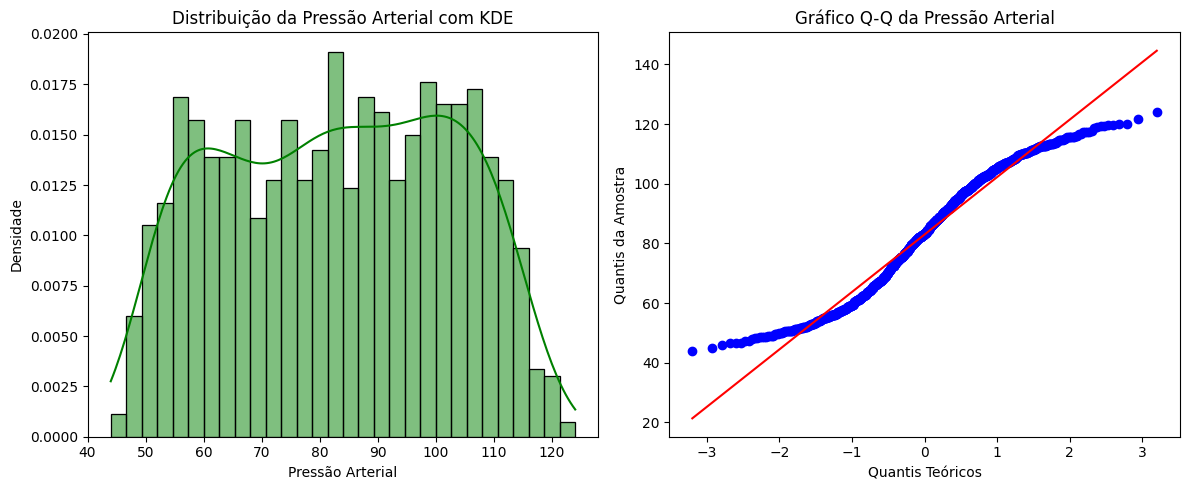

In [56]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
sns.histplot(df_pacientes['PAM'], kde=True, stat="density", color='green', bins=30)
plt.title('Distribuição da Pressão Arterial com KDE')
plt.xlabel('Pressão Arterial')
plt.ylabel('Densidade')

plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
stats.probplot(df_pacientes['PAM'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q da Pressão Arterial')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')

plt.tight_layout()
plt.show()